In [3]:
import pandas as pd
import numpy as np

data_1901 = pd.read_csv('.\\raw_data\\JC-201901-citibike-tripdata.csv')
data_1901.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [4]:
data_1901['starttime'] = pd.to_datetime(data_1901['starttime'], format='%Y-%m-%d %H:%M:%S')
data_1901['stoptime'] = pd.to_datetime(data_1901['stoptime'], format='%Y-%m-%d %H:%M:%S')
data_1901.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [16]:
print(data_1901.dtypes)

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
dtype: object


In [11]:
import datetime as d
import calendar as c 
from datetime import timedelta

delta_incres = 60
base_time = data_1901.iloc[0,1]
day_num = c.monthrange(base_time.year, base_time.month)[1]
start_time = d.datetime(base_time.year, base_time.month, 1)
end_time = d.datetime(base_time.year, base_time.month, day_num, 23, 59, 59)

stations = list(pd.unique(pd.concat([data_1901['start station id'], data_1901['end station id']])))
result_1 = np.zeros([1440 // delta_incres * day_num, len(stations), 2], dtype=int)


In [12]:
current_index = 0
current_time = start_time
while current_time < end_time:
    for i,s in enumerate(stations):
        result_1[current_index][i][0] = len(data_1901.loc[(current_time < data_1901['starttime']) & (data_1901['starttime'] < (current_time + timedelta(minutes=delta_incres))) & (data_1901['start station id'] == s), 'start station id'])
        result_1[current_index][i][1] = len(data_1901.loc[(current_time < data_1901['stoptime']) & (data_1901['stoptime'] < (current_time + timedelta(minutes=delta_incres))) & (data_1901['end station id'] == s), 'end station id'])
    current_time += timedelta(minutes=delta_incres)
    current_index += 1
np.save(('{}_{}_version1.npy'.format(base_time.year, base_time.month)), result_1)

In [13]:
result_2 = np.zeros([(1440 // delta_incres * day_num), len(stations), 2], dtype=int)

for i in range(data_1901.shape[0]):
    index_0 = (data_1901.loc[i , 'starttime'] - start_time).seconds // (delta_incres * 60)
    index_1 = stations.index(data_1901.loc[i, 'start station id'])
    result_2[index_0][index_1][0] += 1

    index_0 = (data_1901.loc[i , 'stoptime'] - start_time).seconds // (delta_incres * 60)
    index_1 = stations.index(data_1901.loc[i, 'end station id'])
    result_2[index_0][index_1][1] += 1
np.save(('{}_{}_version2.npy'.format(base_time.year, base_time.month)), result_2)

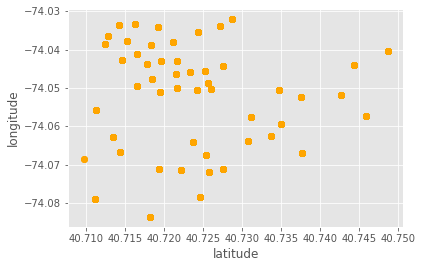

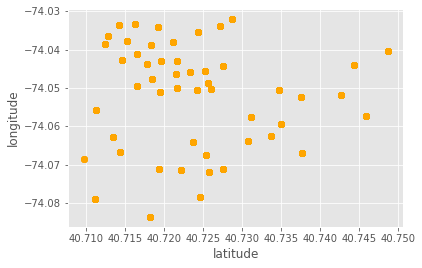

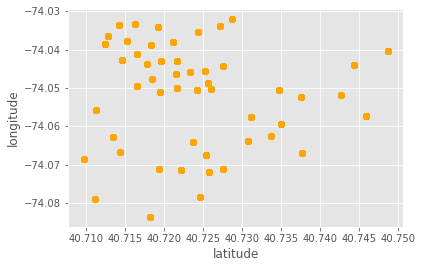

In [15]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.scatter(data_1901['start station latitude'], data_1901['start station longitude'], color = 'orange')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

plt.scatter(data_1901['end station latitude'], data_1901['end station longitude'], color = 'orange')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

latitude = pd.concat([data_1901['start station latitude'], data_1901['end station latitude']])
longitude = pd.concat([data_1901['start station longitude'], data_1901['end station longitude']])
plt.scatter(latitude, longitude, color = 'orange')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

In [9]:
print(latitude.shape)
print(longitude.shape)
print(data_1901.shape[0]*2)

(39352,)
(39352,)
39352


In [17]:
latitude = np.array(latitude)
longitude = np.array(longitude)

x_num, y_num = 16, 16
min_lat = np.min(latitude)
max_lat = np.max(latitude)
sep_lat = (max_lat-min_lat) / x_num
min_lon = np.min(longitude)
max_lon = np.max(longitude)
sep_lon = (max_lon-min_lon) / y_num

print(min_lat, max_lat, sep_lat, min_lon, max_lon, sep_lon)

40.70965083364061 40.74871594538023 0.0024415694837265356 -74.0836394 -74.0321082 0.0032206999999999653


In [18]:
for i in range(data_1901.shape[0]):
    data_1901.loc[i, 'start grid'] = (data_1901.loc[i, 'start station latitude']-min_lat)//sep_lat*latitude.shape[0] + (data_1901.loc[i, 'start station longitude']-min_lon)//sep_lon
    data_1901.loc[i, 'end grid'] = (data_1901.loc[i, 'end station latitude']-min_lat)//sep_lat*latitude.shape[0] + (data_1901.loc[i, 'end station longitude']-min_lon)//sep_lon

In [19]:
grids = list(np.unique(pd.concat([data_1901['start grid'], data_1901['end grid']])))
grid_map = {v:i for i, v in enumerate(grids)}

data_1901['start grid'] = data_1901['start grid'].apply(lambda x: grid_map[x])
data_1901['end grid'] = data_1901['end grid'].apply(lambda x: grid_map[x])

data_1901.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start grid,end grid
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,11,5
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,11,26
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,11,2
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,11,26
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,11,26


In [22]:
result_3 = np.zeros([(1440 // delta_incres * day_num), len(grids), 2], dtype=int)

for i in range(data_1901.shape[0]):
    index_0 = (data_1901.loc[i , 'starttime'] - start_time).seconds // (delta_incres * 60)
    index_1 = data_1901.loc[i, 'start grid']
    result_3[index_0][index_1][0] += 1

    index_0 = (data_1901.loc[i , 'stoptime'] - start_time).seconds // (delta_incres * 60)
    index_1 = data_1901.loc[i, 'end grid']
    result_3[index_0][index_1][1] += 1
np.save(('{}_{}_grid.npy'.format(base_time.year, base_time.month)), result_3)